# Finance

## Libraries

In [42]:
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_datareader import data, wb

%matplotlib inline

## Data

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [8]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
CG = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [15]:
tickers = ['BAC', 'CG', 'GS', 'JPM', 'MS', 'WFC']

In [16]:
bank_stocks = pd.concat([BAC, CG, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [19]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [20]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                     CG                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364239  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009903  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052429  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002815  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024086  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224972  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249123  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345776  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382027  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756565  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104454  
2006-01-04   31.799999  31.530001  10870000.0  19.871267  
2006-01-05   31.500000  31.495001  10158000.0  19.849213  
2006-01-06   31.580000  31.680000   8403800.0  19.965805  
2006-01-09   31.674999  31.674999   5619600.0  19.962658  

[5 rows x 36 columns]

# EDA

In [21]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
CG     564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

This dataframe will contain the returns for each bank's stock. returns are typically defined by:
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [22]:
returns = pd.DataFrame()

In [23]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,CG Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


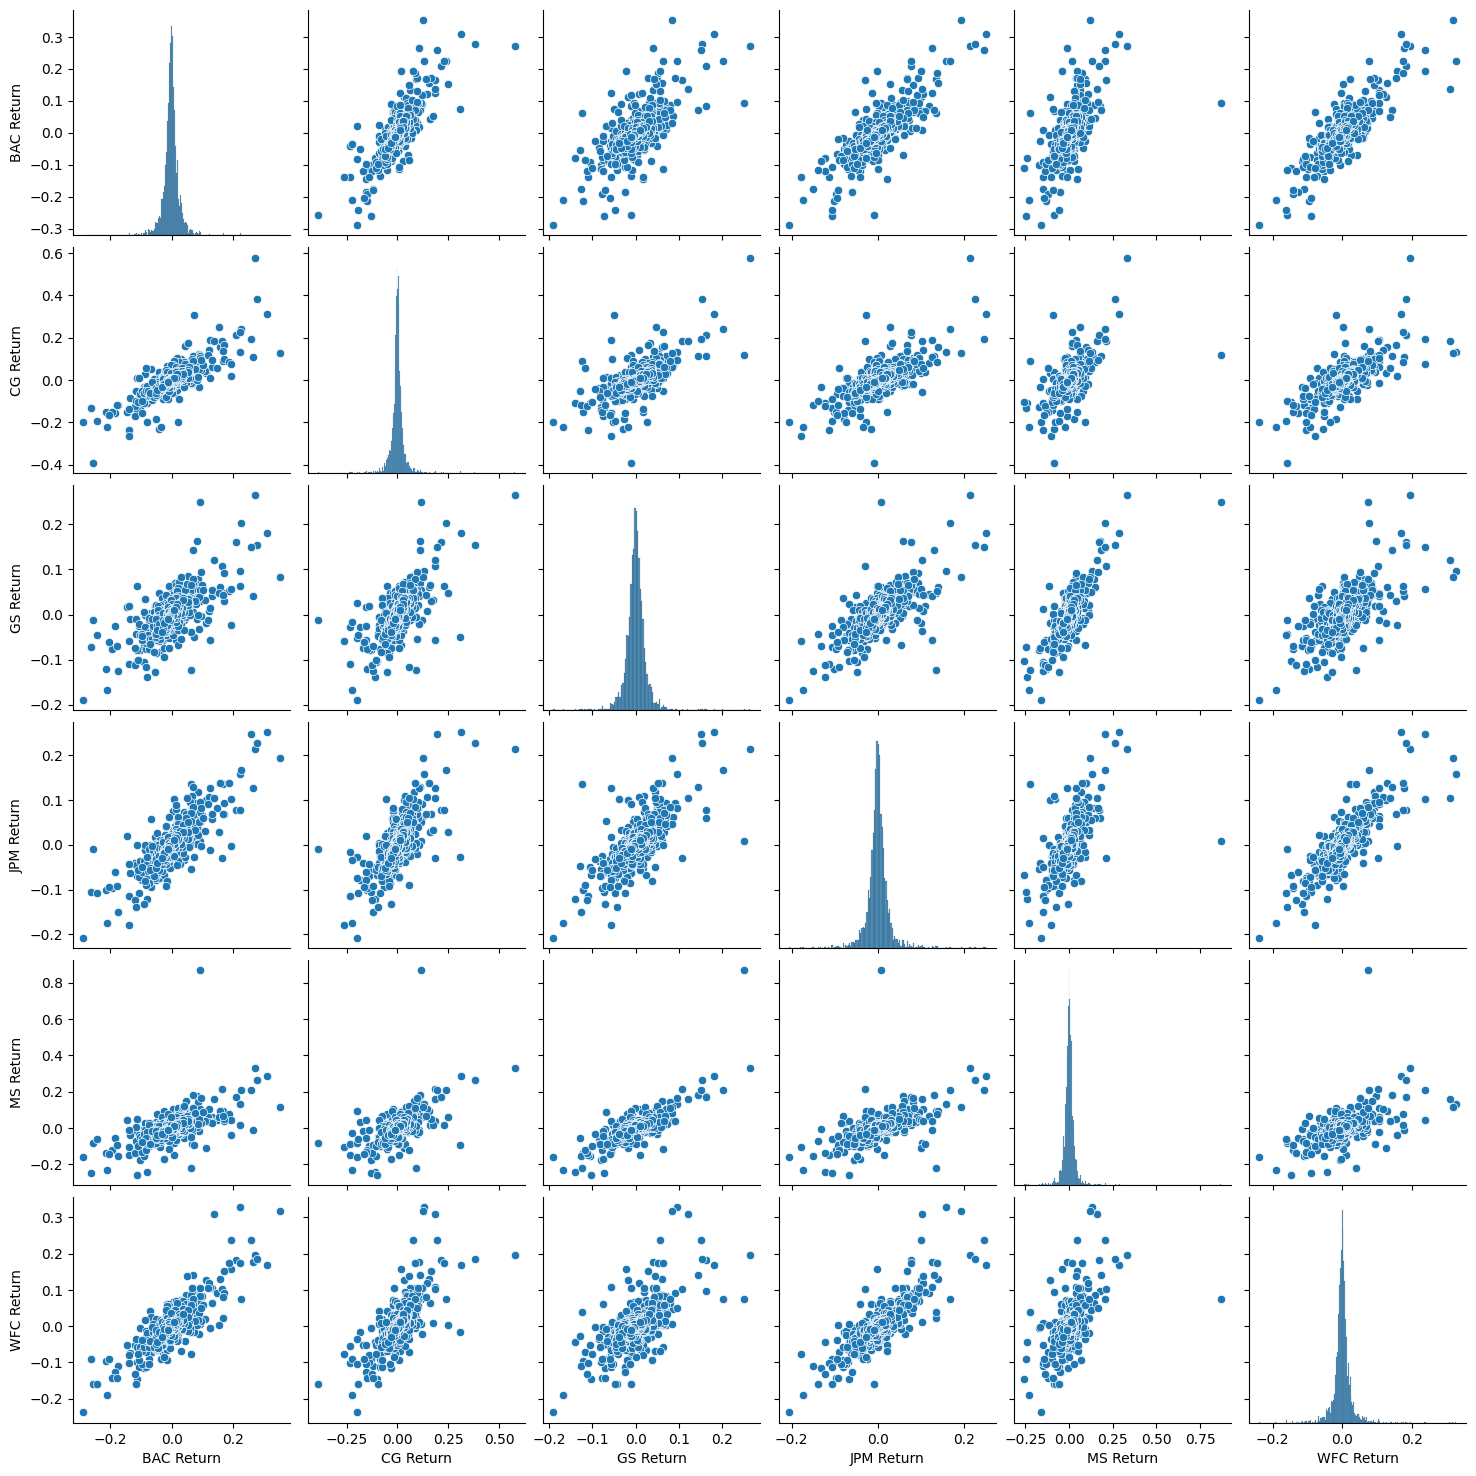

In [25]:
sns.pairplot(returns[1:]);

In [28]:
returns.idxmin()

BAC Return   2009-01-20
CG Return    2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [29]:
returns.idxmax()

BAC Return   2009-04-09
CG Return    2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [30]:
returns.std()

BAC Return    0.036647
CG Return     0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [32]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
CG Return     0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

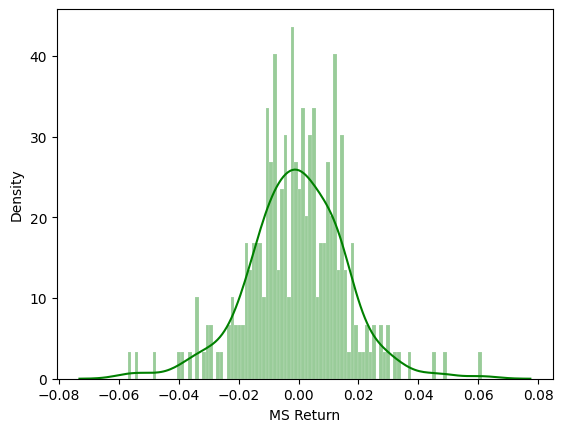

In [38]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],
             color='green',
             bins=100,
             kde=True,
             stat="density",
             kde_kws=dict(cut=3),
             alpha=.4,
             edgecolor=(1, 1, 1, .4),);

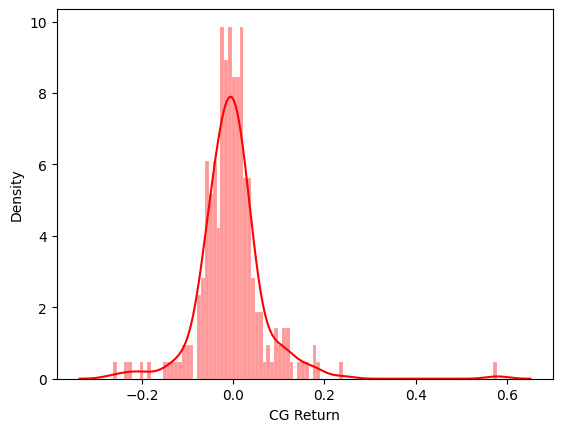

In [41]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['CG Return'],
             color='red',
             bins=100,
             kde=True,
             stat="density",
             kde_kws=dict(cut=3),
             alpha=.4,
             edgecolor=(1, 1, 1, .4),);

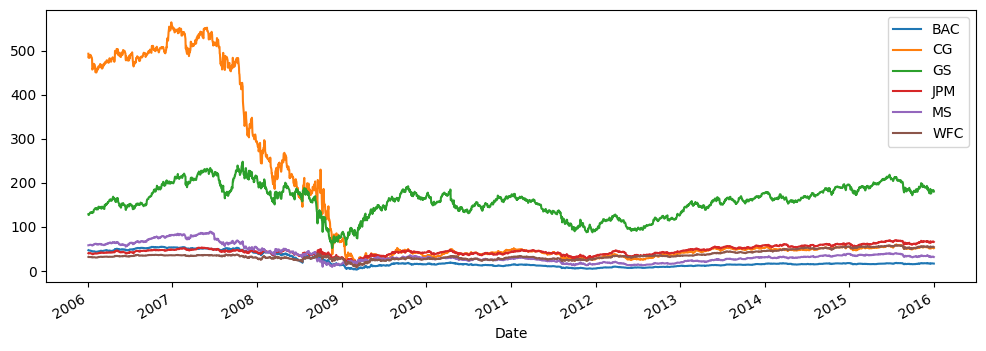

In [44]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend();

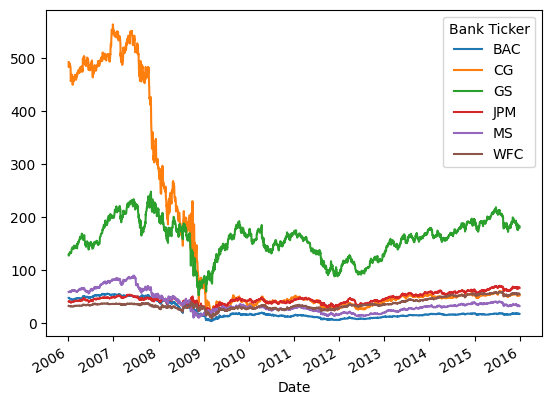

In [ ]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot();

## Moving Averages

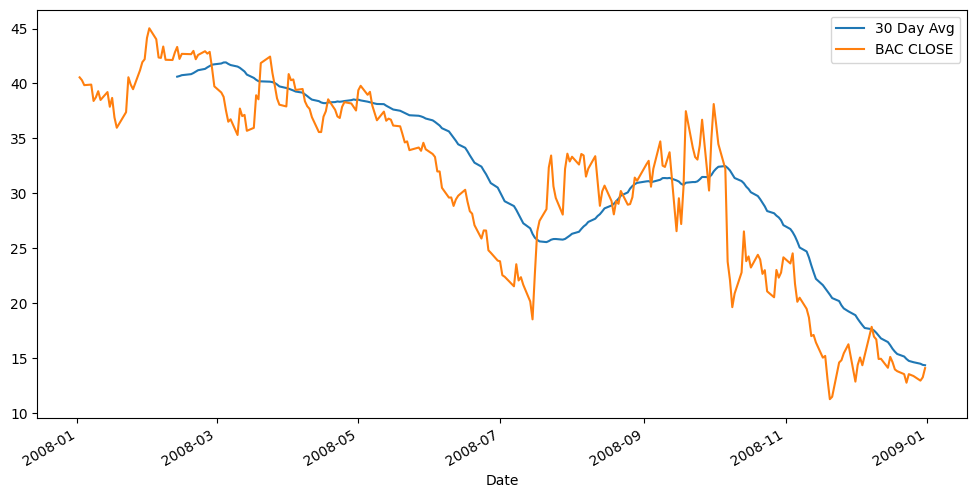

In [49]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend();

## Heatmap

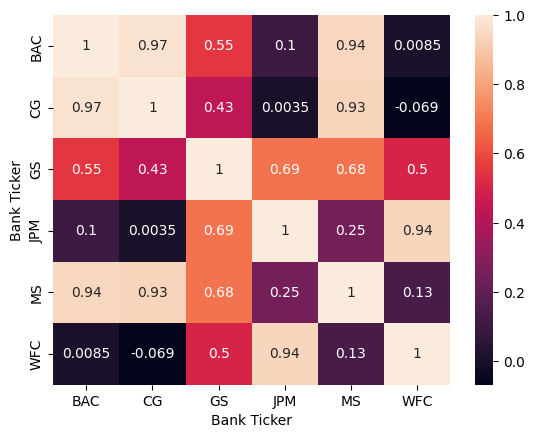

In [50]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1,
            level='Stock Info').corr(), annot=True);

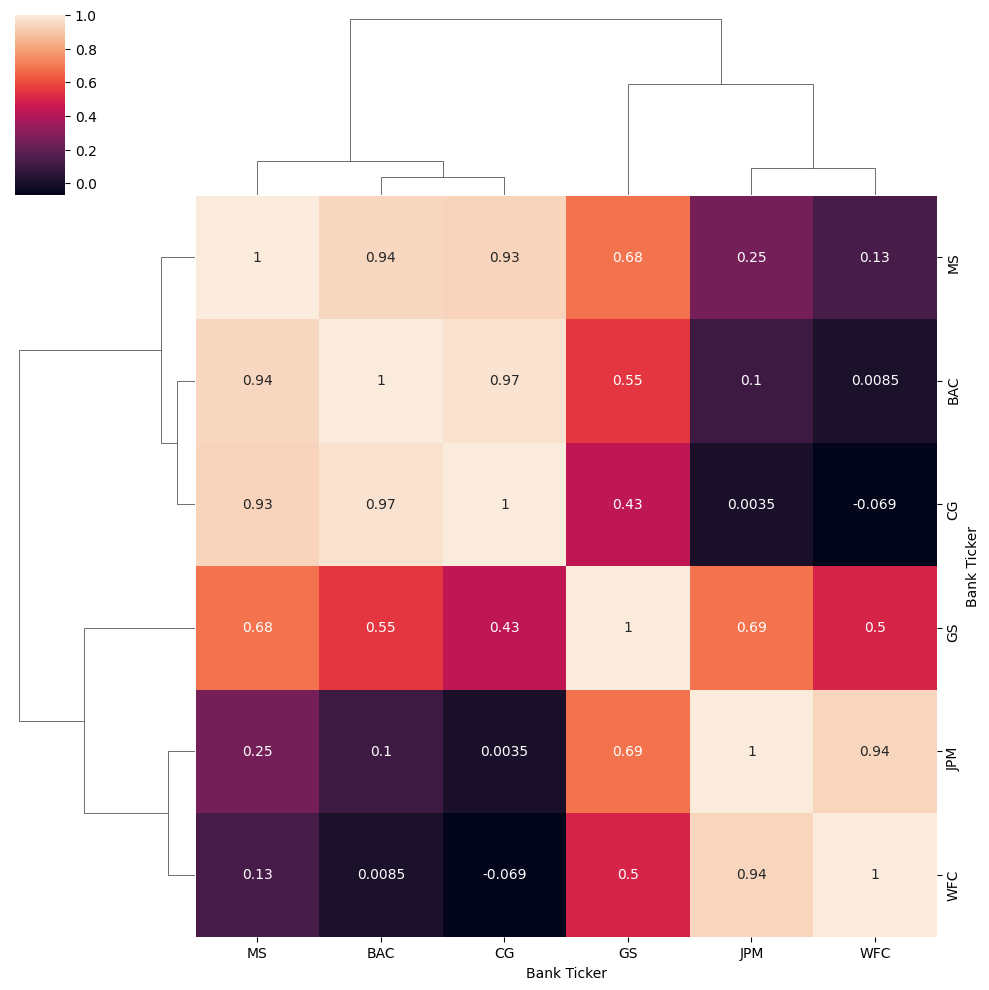

In [51]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1,
               level='Stock Info').corr(), annot=True);